In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

In [3]:
data_x=[]
data_y=[]
d=28*28
n=6000

for lettre in ["A", "B", "C"] :
    for image_path in glob.glob("./data/train/"+lettre+"/*.png"):
        data_x.append(mpimg.imread(image_path))
        if lettre=="A" :
            data_y.append(1)
        else :
            data_y.append(-1)
for k in range(len(data_x)) :
    new=[]
    for i in range(28) :
        for j in range(28) :
            new.append(data_x[k][i][j])
    data_x[k]=new
    
    
X=np.array(data_x)
Y=np.array(data_y)


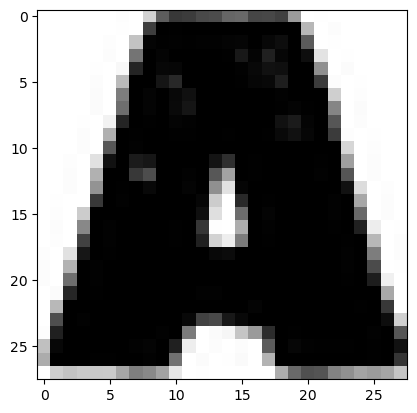

In [65]:
i = np.random.randint(n)
plt.imshow(np.reshape(data_x[i],(28,28)), cmap='binary')
plt.show()

In [156]:
def l1(x,y) :
    return(x-y)**2

def grad_l1(w,i) :
    return 2*X[i]*((w.T)@X[i]-Y[i])

print(X[i].shape)

(784,)


In [157]:
def f1(w):
    return (np.linalg.norm(X@w-Y)**2)/n

def grad_f1(w):
    return X.T@((X@w-Y))/n

In [192]:
opt_w_ols = np.linalg.inv(X.T@X/n)@X.T@Y/n
gamma=0.002

def compute_stoc(T) :
    values_stoc = np.zeros(T)
    w_stoc=np.zeros(d)
    for t in range(T):
        values_stoc[t] = f1(w_stoc)
        w_stoc -= gamma*grad_l1(w_stoc,np.random.randint(n))
    values_stoc -= f1(opt_w_ols)
    return values_stoc

def compute_ols(T,ratio) :
    values = np.zeros(T)
    w_ols= np.zeros(d)
    for t in range(T):
        if (t%ratio)==0 :
            w_ols -= gamma*grad_f1(w_ols)
        values[t] = f1(w_ols)   
    values -= f1(opt_w_ols)   
    return values

In [204]:
T=6000
ratio = 5980
values_ols = compute_ols(T,ratio) 
values_stoc = compute_stoc(T)

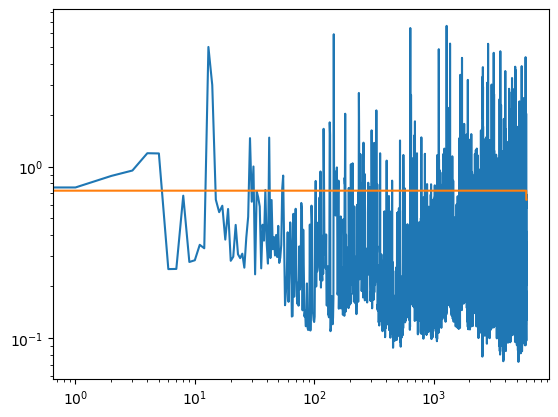

In [203]:
plt.loglog([t for t in range(T)], values_stoc, values_ols)
plt.show()

In [15]:
def l2(x,y) :
    return(np.log(1 + np.exp(-x*y)))